In [52]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib

In [4]:
path =  'C://python//train//'
fallPath = path + 'fall_csv//'
normalPath = path + 'normal_csv//'

In [5]:
fallLabel = []
normalLabel = []

In [6]:
for file in os.listdir(fallPath):
    df = pd.read_csv(fallPath + file)
    for i in range(len(df)):
        fallLabel.append(1)

In [8]:
fallLabel, len(fallLabel)

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [9]:
for file in os.listdir(normalPath):
    df = pd.read_csv(normalPath + file)
    for i in range(len(df)):
        normalLabel.append(0)

In [10]:
normalLabel, len(normalLabel)

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [11]:
rawFallData = pd.concat([pd.read_csv(fallPath + file) for file in os.listdir(fallPath)])
rawNormalData = pd.concat([pd.read_csv(normalPath + file) for file in os.listdir(normalPath)]) 

In [12]:
rawFallData

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.650849,0.260888,-0.237832,0.976230,0.655615,0.250158,-0.229014,0.975860,0.658791,0.249857,...,0.310433,0.355510,0.688044,0.632810,0.206828,0.461684,0.649916,0.592592,0.304872,0.340053
1,0.650641,0.261259,-0.244321,0.978529,0.655211,0.250313,-0.234800,0.978108,0.658237,0.249937,...,0.306166,0.330230,0.684328,0.643004,0.208066,0.436017,0.650915,0.611309,0.282247,0.319373
2,0.649662,0.260937,-0.255743,0.980651,0.654515,0.250039,-0.246644,0.980246,0.657660,0.249646,...,0.302248,0.306822,0.693633,0.659918,0.148769,0.422753,0.647366,0.603329,0.283638,0.297818
3,0.648130,0.260014,-0.252279,0.982541,0.652944,0.249159,-0.244350,0.982130,0.656177,0.248715,...,0.310185,0.286525,0.695044,0.666498,0.139335,0.418765,0.645526,0.600023,0.287363,0.279103
4,0.646501,0.258471,-0.259396,0.984264,0.650963,0.247970,-0.251609,0.983868,0.654322,0.247462,...,0.304347,0.270107,0.696185,0.675785,0.111699,0.434611,0.645853,0.604641,0.276096,0.267134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.160799,0.963536,-0.464292,0.993283,0.141949,0.984514,-0.459444,0.995875,0.138463,0.983681,...,0.566870,0.589197,0.494101,0.724197,0.818807,0.426369,0.512871,0.695490,0.632515,0.664566
172,0.152787,0.970812,-0.363840,0.993288,0.140875,0.992987,-0.369465,0.995629,0.137268,0.994688,...,0.587728,0.597520,0.500680,0.791539,0.886953,0.412795,0.530788,0.726894,0.649841,0.663301
173,0.156595,0.986550,-0.394220,0.992146,0.145853,1.005527,-0.413725,0.994413,0.143367,1.008559,...,0.737441,0.603347,0.517984,0.813483,0.969398,0.410097,0.538654,0.768043,0.784521,0.653310
174,0.509581,0.816944,0.195854,0.980702,0.518014,0.817572,0.195569,0.985501,0.519276,0.819804,...,-0.049318,0.573872,0.176975,0.947436,-0.149778,0.389818,0.179801,0.951962,-0.087850,0.595326


In [13]:
rawNormalData

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.686161,0.302170,-0.303616,0.970712,0.690625,0.293724,-0.294094,0.970275,0.693496,0.293666,...,0.218570,0.442965,0.723905,0.726073,0.000662,0.545405,0.682941,0.713045,0.136406,0.423353
1,0.684368,0.302311,-0.366379,0.973638,0.688871,0.293740,-0.353751,0.973237,0.691800,0.293676,...,0.120681,0.433805,0.709429,0.718525,0.003122,0.546418,0.678181,0.716201,0.012931,0.435455
2,0.684070,0.302624,-0.367500,0.976267,0.688548,0.293905,-0.355287,0.975893,0.691555,0.293879,...,0.111604,0.428987,0.704437,0.712177,0.000379,0.552229,0.672806,0.716283,0.005509,0.450702
3,0.683571,0.302659,-0.344052,0.978638,0.688139,0.293979,-0.333747,0.978294,0.691201,0.294003,...,0.125225,0.437574,0.690100,0.713635,-0.017802,0.569600,0.669656,0.716533,0.025404,0.474207
4,0.681350,0.302996,-0.338390,0.980772,0.686035,0.294208,-0.327354,0.980459,0.689066,0.294210,...,0.102109,0.434292,0.692009,0.713914,-0.028923,0.578256,0.669238,0.724810,-0.001221,0.485569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.797275,0.413273,-0.089693,0.999393,0.804522,0.394290,-0.109114,0.999429,0.807743,0.393152,...,0.138698,0.544835,0.732454,0.901132,-0.047300,0.843728,0.666470,0.874648,0.129876,0.541022
132,0.804761,0.407230,-0.095279,0.999274,0.811716,0.388854,-0.114854,0.999299,0.814683,0.387803,...,0.160034,0.548393,0.732925,0.907109,-0.056589,0.848495,0.670489,0.874232,0.145388,0.546716
133,0.808491,0.405097,-0.105900,0.999231,0.816377,0.386900,-0.126842,0.999254,0.819481,0.385890,...,0.132151,0.556467,0.732177,0.911287,-0.090849,0.853055,0.660343,0.872693,0.109002,0.558271
134,0.811653,0.400180,-0.121870,0.999219,0.820245,0.382697,-0.143654,0.999234,0.823158,0.381898,...,0.134285,0.567613,0.725196,0.911163,-0.072141,0.859458,0.662935,0.870192,0.114650,0.572421


In [14]:
data = np.concatenate((rawFallData, rawNormalData), axis=0)
label = np.concatenate((fallLabel, normalLabel), axis=0)

In [20]:
len(data), len(label)

(8855, 8855)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=0, shuffle=True)

In [28]:
x_train, len(x_train)

(array([[ 0.63573575,  0.23760732, -0.4049471 , ...,  0.76798552,
         -0.01307579,  0.87153184],
        [ 0.32820579,  0.68310523, -0.2281336 , ...,  0.83083951,
          0.88808745,  0.5726378 ],
        [ 0.76282245,  0.57555664, -0.58559364, ...,  0.884592  ,
          0.40139532,  0.71913981],
        ...,
        [ 0.48635116,  0.52341586, -0.79525554, ...,  0.81119663,
          0.57562757,  0.309194  ],
        [ 0.26735958,  0.25565073, -0.38949585, ...,  0.80499923,
         -0.01399355,  0.8503598 ],
        [ 0.63442981,  0.1594501 , -0.44662032, ...,  0.85925412,
         -0.03804653,  0.90618563]]),
 6198)

In [29]:
y_train, len(y_train)

(array([0, 1, 0, ..., 0, 0, 0]), 6198)

In [32]:
model = SVC(kernel='linear', C=1, gamma=1)
model.fit(x_train, y_train)
 
# print prediction results
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1896
           1       0.87      0.67      0.76       761

    accuracy                           0.88      2657
   macro avg       0.88      0.82      0.84      2657
weighted avg       0.88      0.88      0.87      2657



In [33]:
cm = confusion_matrix(y_test, y_pred)

In [34]:
cm

array([[1821,   75],
       [ 251,  510]], dtype=int64)

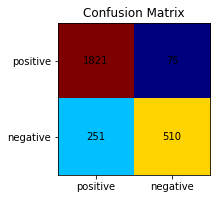

In [37]:
norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

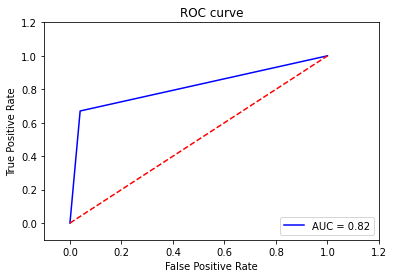

Gini_coefficient = 0.6306138658327651


In [40]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gini_coefficient=2*roc_auc - 1
print("Gini_coefficient =",Gini_coefficient)

In [41]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.961 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.954 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.961 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.850 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.842 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.846 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.836 total time=   0.5s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.997 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [45]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [46]:
grid_pred = grid.predict(x_test)
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1896
           1       1.00      1.00      1.00       761

    accuracy                           1.00      2657
   macro avg       1.00      1.00      1.00      2657
weighted avg       1.00      1.00      1.00      2657



In [47]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [48]:
cm = confusion_matrix(y_test, grid_pred)

In [49]:
cm

array([[1896,    0],
       [   0,  761]], dtype=int64)

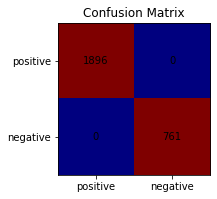

In [50]:
norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

In [53]:
joblib.dump(grid, path + 'model//model.sav')

['C://python//train//model//model.sav']